## Q0

1. What makes a model “linear”? “Linear” in what?
   - A function is linear if the a line of best fit is used to represent the overall relationship between the coefficients. Additionally, it is linear if the coefficient isn't squared (so the highest degree of the variables is 1). There should be a constant rate of change between the variables, which is their relationship to each other. 
2. How do you interpret the coefficient for a dummy/one-hot-encoded variable? (This is a trick question, and the trick involves how you handle the intercept of the model.) There’s further explanation at the end of this document, if needed.
   - For the dummy variable, you need to drop one of the dummy variables (the y-intercept or constant) in order to avoid multicollinearity. This occurs when you overuse dummy variables, leading to a perfect correlation between the variables, which leads to the singularity effect (your model not working). The coefficient would then be the average change associated with each category compared to the reference (dropped) category.
3. Can linear regression be used for classification? Explain why, or why not.
   - Linear regression could technically be used for classification in certain scenarios if it was binary (two groups) by creating the line of best fit and then categorizing values by above the line and below it, however this is very much not ideal. One reason it's not ideal is because classification often involves data that isn't linear, while regressions main purpose is to find linear relationships. Additionally, classification requires outputs of between 0 and 1, since it uses probabilities. However regression can produce outputs that are negative or outside of the 0 to 1 range. Even if it did produce an output that was within the range, it can be a fake probability, as regression does not use probability. 
4. If you have a high accuracy on training but low on testing, what might be the problem? It’s also possible you’ll see a pattern in the residuals.
   - The problem for low accuracy on the testing data may be from multiple factors. For example, this could be a problem of overfitting, where the model is more memorizing the training data instead of finding an applicable general relationship between the variables. This may also lead to patterns in the residuals as the errors created in the model aren't random, which reveals that there is a problem with the model itself. Low accuracy on the test data could also be due to the initial data having too much noise, causing the model to not be able to create an accurate pattern. The model might also not be able to create an accurate pattern if there isn't enough training data for the model to use.
5. Review this page: Non-Linear with Linear What are two ways to incorporate nonlinear relationships between your target/response/dependent/outcome variable y and your features/control/response/independent variables x?
    - The first way to deal with a non linear relationship is to modify the data to make new features by adding polynomials (squares, cubes, etc.), and this is called polynomial feature expansion. This fits the data in a unique way, as the line of best fit becomes curved to fit the curved relationship of the x and y variable. The next way is to choose a model that can deal with non-linearity, such as Decision tree regression. This uses a tree-like model to represent the data with a dynamic branch-like lines. This allows for non linear relationships between the x and y to be represented through these "branches".
1. What is the interpretation of the intercept? A slope coefficient for a variable? The coefficient for a dummy/one-hot-encoded variable?
   - Intercept is the predicted value when the control variable is at 0. The slope is how much a variable changes with regard to the independent variable. The coefficient of the dummy variable is the average difference in the dependent variable between the categories, which is compared to the constant version.

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

q1_clean = pd.read_csv("https://raw.githubusercontent.com/DS3001/linearRegression/refs/heads/main/data/Q1_clean.csv")
q1_clean.head()

,Price,Review Scores Rating,Neighbourhood,Property Type,Room Type
0,549,96.0,Manhattan,Apartment,Private room
1,149,100.0,Brooklyn,Apartment,Entire home/apt
2,250,100.0,Manhattan,Apartment,Entire home/apt
3,90,94.0,Brooklyn,Apartment,Private room
4,270,90.0,Manhattan,Apartment,Entire home/apt


## Q1

### 1. Compute the average prices and scores by Neighborhood ; which borough is the most expensive on average? Create a kernel density plot of price and log price, grouping by Neighborhood.

In [3]:
neighborhood = q1_clean.groupby('Neighbourhood ').agg({'Review Scores Rating': 'mean','Price': 'mean'})
print(neighborhood)

                Review Scores Rating       Price
Neighbourhood                                   
Bronx                      91.654378   75.276498
Brooklyn                   92.363497  127.747378
Manhattan                  91.801496  183.664286
Queens                     91.549057   96.857233
Staten Island              90.843750  146.166667


From this data, we can see that Manhattan is the most expensive neighborhood on average

<Axes: xlabel='Log_Price', ylabel='Density'>

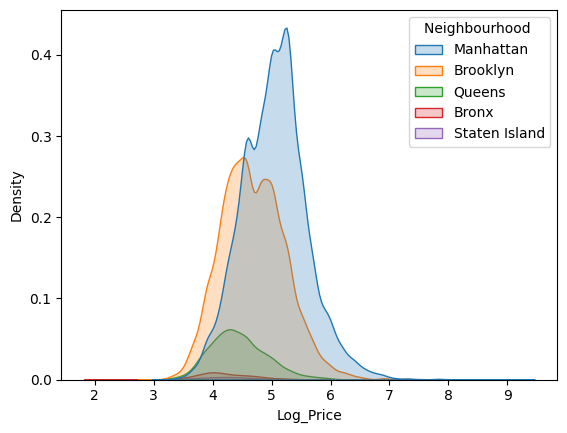

In [4]:
q1_clean = q1_clean[q1_clean['Price'] > 0]

q1_clean['Log_Price'] = np.log(q1_clean['Price'])

sns.kdeplot(q1_clean, x = "Log_Price", hue="Neighbourhood ", fill=True)

<Axes: xlabel='Price', ylabel='Density'>

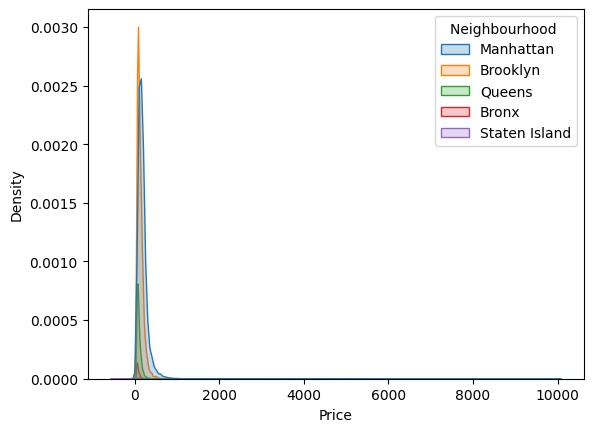

In [5]:
sns.kdeplot(q1_clean, x = "Price", hue = "Neighbourhood ", fill = True)

### 2. Regress price on Neighborhood by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear model. Compare the coefficients in the regression to the table from part 1. What pattern do you see? What are the coefficients in a regression of a continuous variable on one categorical variable?

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
X1 = pd.get_dummies(q1_clean['Neighbourhood ']) 
y = q1_clean["Price"]

reg = LinearRegression(fit_intercept=False).fit(X1, y)
results = pd.DataFrame({'Neighbourhood ': X1.columns, 'coefficient': reg.coef_})
print(results)


  Neighbourhood   coefficient
0          Bronx    75.276498
1       Brooklyn   127.747378
2      Manhattan   183.664286
3         Queens    96.857233
4  Staten Island   146.166667


We can observe that the coefficients in the regression are exactly the same as they were in the original table. This is because we regressed the price without an intercept. We didn't drop one of the variables when using one hot encoding, which led to perfect multicollinearity. Therefore, the coefficients in this case directly show the difference in the mean price for each neighborhood. 

### 3. Repeat part 2, but leave an intercept in the linear model. How do you have to handle the creation of the dummies differently? What is the intercept? Interpret the coefficients. How can I get the coefficients in part 2 from these new coefficients?

In [33]:
X1 = pd.get_dummies(q1_clean['Neighbourhood '], drop_first = True) 
y = q1_clean["Price"]

reg = LinearRegression().fit(X1, y)
results = pd.DataFrame({'Neighbourhood ': X1.columns, 'coefficient': reg.coef_})
print(results)

  Neighbourhood   coefficient
0       Brooklyn    52.470881
1      Manhattan   108.387789
2         Queens    21.580735
3  Staten Island    70.890169


To leave the intercept in the linear model and avoid the dummy variable trap, we have to drop one variable when getting our dummies. This will mean that one of the variables won't have a column, meaning that the model can then assume that the variable with 0 values is the reference variable. The intercept in this case would then be the mean price of the dropped reference category, while the coefficients would represent how much the mean price of each neighborhood differs in comparison to the reference neighborhood. From these new coefficients, you can then add the mean of the first dropped variable (in this case it's the Bronx) to every other mean neighborhood price. So for example, in part 3 the coefficient shown for Brooklyn is 52.47, and if you add the mean for the Bronx from part 2, it then becomes 127.75, which is the coefficient for Brooklyn from part 2.

### 4. Split the sample 80/20 into a training and a test set. Run a regression of Price on Review Scores Rating and Neighborhood . What is the R^2 and RMSE on the test set? What is the coefficient on Review Scores Rating? What is the most expensive kind of property you can rent?

In [64]:
from sklearn.model_selection import train_test_split

X = pd.get_dummies(q1_clean[['Neighbourhood ', 'Review Scores Rating']], drop_first=True)
y = q1_clean["Price"]

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression().fit(X_train, Y_train) 

#stores predicted values for target variable
y_test_pred = model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mse = mean_squared_error(Y_test, y_test_pred)
rmse = mse**0.5
r2 = r2_score(Y_test, y_test_pred)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

results = pd.DataFrame({'variable': X.columns, 'coefficient': model.coef_})
results

Root Mean Squared Error (RMSE): 140.91821103729345
R-squared (R²): 0.045925883817350965


,variable,coefficient
0,Review Scores Rating,1.211852
1,Neighbourhood _Brooklyn,51.555970
2,Neighbourhood _Manhattan,107.413553
3,Neighbourhood _Queens,20.198573
4,Neighbourhood _Staten Island,23.454672


The RMSE on the test set is 140.92, while the R^2 is 0.046. The coefficient of the review scores rating is 1.21, which means that for every one point increase in the rating, the predicted price of the property goes up by 1.21. Since this is positive, we can assume that the most expensive type of property we can buy would be a property located in Manhattan, with a review score rating of 10. 

### Run a regression of Price on Review Scores Rating and Neighborhood and Property Type. What is the R^2 and RMSE on the test set? What is the coefficient on Review Scores Rating? What is the most expensive kind of property you can rent?

In [65]:
X = pd.get_dummies(q1_clean[['Neighbourhood ', 'Review Scores Rating', 'Property Type']], drop_first=True)
y = q1_clean["Price"]
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression().fit(X_train, Y_train) 

#stores predicted values for target variable
y_test_pred = model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mse = mean_squared_error(Y_test, y_test_pred)
rmse = mse**0.5
r2 = r2_score(Y_test, y_test_pred)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

results = pd.DataFrame({'variable': X.columns, 'coefficient': model.coef_})
results

Root Mean Squared Error (RMSE): 140.30266238276283
R-squared (R²): 0.054242713551245325


,variable,coefficient
0,Review Scores Rating,1.201011
1,Neighbourhood _Brooklyn,59.633702
2,Neighbourhood _Manhattan,121.005520
3,Neighbourhood _Queens,26.830617
4,Neighbourhood _Staten Island,15.700974
5,Property Type_Bed & Breakfast,-28.703920
6,Property Type_Boat,47.070419
7,Property Type_Bungalow,83.972440
8,Property Type_Cabin,12.389621
9,Property Type_Camper/RV,-13.817125


The RMSE is 140.3, while the R^2 is 0.054. The coefficient on the Review Score rating is 1.2, which means that for every point increase in the rating, the price went up by 1.2. We can observe from the results that the most expensive property we can rent is a bungalow. 

### 6. What does the coefficient on Review Scores Rating mean if it changes from part 4 to 5? Hint: Think about how multiple linear regression works.

If the coefficient on review scores rating changed from part 4 to 5, it's because we are accounting for additional variables. In part 4, we were calculating how much the price goes up for each point increase in rating while controlling for Neighborhood, but in part 5 we were controlling for Neighborhood and Property. This means that the model is adjusting for the influence of both Neighborhood and Property in part 5, which explains why the coefficient on review scores rating changed. 

## Q2

### 1. Load cars_hw.csv. These data were really dirty, and I’ve already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly skewed variables that require a log or arcsinh transformation) Note this is different than normalizing: there is a text below that explains further. Clean the data however you think is most appropriate.

In [142]:
cars = pd.read_csv("/workspaces/DS-3021/data/cars_hw.csv")
cars['Price'] = pd.to_numeric(cars['Price'])

from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()
cars_scaled = scaler.fit_transform(cars[['Seating_Capacity', 'Mileage_Run', 'Make_Year']])

cars.head()


,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


In [126]:
cars.dtypes

Unnamed: 0            int64
Make                 object
Make_Year             int64
Color                object
Body_Type            object
Mileage_Run           int64
No_of_Owners         object
Seating_Capacity      int64
Fuel_Type            object
Transmission         object
Transmission_Type    object
Price                 int64
dtype: object

### 2. Summarize the Price variable and create a kernel density plot. Use .groupby() and .describe() to summarize prices by brand (Make). Make a grouped kernel density plot by Make. Which car brands are the most expensive? What do prices look like in general?

In [143]:
price_summary = cars['Price'].describe()

price_summary_by_brand = cars.groupby('Make')['Price'].describe()

print(price_summary)
print(price_summary_by_brand)


count    9.760000e+02
mean     7.410195e+05
std      3.673234e+05
min      1.880000e+05
25%      4.757500e+05
50%      6.665000e+05
75%      8.830000e+05
max      2.941000e+06
Name: Price, dtype: float64
               count          mean           std        min        25%  \
Make                                                                     
Chevrolet        6.0  4.535000e+05  2.466064e+05   267000.0   288500.0   
Datsun           3.0  2.896667e+05  1.050397e+04   279000.0   284500.0   
Ford            52.0  7.211731e+05  1.409277e+05   290000.0   635000.0   
Honda           73.0  7.989726e+05  2.665091e+05   316000.0   581000.0   
Hyundai        305.0  6.918918e+05  2.791597e+05   248000.0   485000.0   
Jeep             4.0  1.499500e+06  1.525134e+05  1290000.0  1447500.0   
Kia              8.0  1.614750e+06  1.190567e+05  1369000.0  1579000.0   
MG Motors       35.0  1.869457e+06  1.216611e+05  1589000.0  1786500.0   
Mahindra        18.0  1.100167e+06  1.755493e+05   79600

<Axes: xlabel='Price', ylabel='Density'>

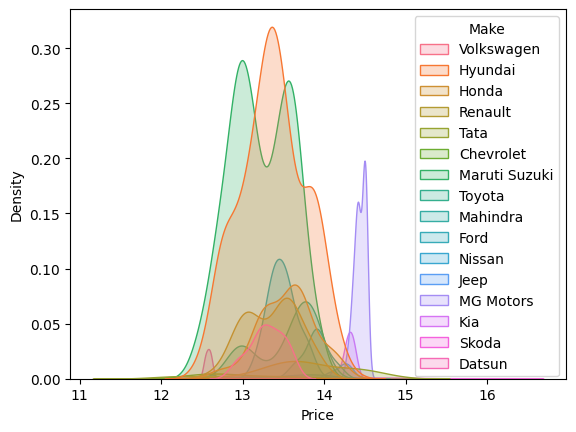

In [144]:
cars['Price'] = np.log(cars['Price'])

sns.kdeplot(cars, x = "Price", hue="Make", fill=True)

As we can observe from the graph, very popular car brands such as Hyundai and Toyota have a very high density, and their prices span pretty wide. The most expensive brand with a very concentrated density is MG Motors, and the most expensive cars we can see are made by Tata.

### 3. Split the data into an 80% training set and a 20% testing set.

In [145]:
X = pd.get_dummies(cars[['Make']], drop_first=True)
y = cars["Price"]

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 4. Make a model where you regress price on the numeric variables alone; what is the R^2 and RMSE on the training set and test set? Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use pd.get_dummies(); be careful of the dummy variable trap); what is the R^2 and RMSE on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the R^2 and RMSE on the test set? Does the joint model perform better or worse, and by home much?

In [146]:
X = cars[['Mileage_Run', 'Seating_Capacity', 'Make_Year']]
y = cars["Price"]
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression().fit(X_train, Y_train) 

#stores predicted values for target variable
y_test_pred = model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

test_mse = mean_squared_error(Y_test, y_test_pred)
test_rmse = test_mse**0.5
test_r2 = r2_score(Y_test, y_test_pred)

print(f"test_rmse: {test_rmse}")
print(f"test r^2: {test_r2}")

y_train_pred = model.predict(X_train)

train_mse = mean_squared_error(Y_train, y_train_pred)
train_rmse = train_mse**0.5
train_r2 = r2_score(Y_train, y_train_pred)

print(f"train_rmse: {train_rmse}")
print(f"train r^2: {train_r2}")


test_rmse: 0.3441661940197742
test r^2: 0.37887654254503
train_rmse: 0.34586399898317854
train r^2: 0.41700138783176044


In [151]:
X = pd.get_dummies(cars[['Body_Type', 'No_of_Owners', 'Fuel_Type', 'Transmission', 'Transmission_Type']], drop_first=True)
y = cars["Price"]
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression().fit(X_train, Y_train) 

#stores predicted values for target variable
y_test_pred = model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mse = mean_squared_error(Y_test, y_test_pred)
rmse = mse**0.5
r2 = r2_score(Y_test, y_test_pred)

print(f"rmse: {rmse}")
print(f"r^2: {r2}")


rmse: 0.29723324047036226
r^2: 0.5367277728870576


From the two RMSE's we generated for each model on the test set, we can see that the test set with all of the categorical variables had a lower RMSE and therefore performed better. 

In [150]:
X_categorical = pd.get_dummies(cars[['Body_Type', 'No_of_Owners', 'Fuel_Type', 'Transmission', 'Transmission_Type']], drop_first=True)
X_combined = pd.concat([X_categorical, cars[['Mileage_Run', 'Seating_Capacity', 'Make_Year']]], axis=1)

y = cars["Price"]

X_train, X_test, Y_train, Y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

model = LinearRegression().fit(X_train, Y_train)

y_test_pred = model.predict(X_test)

test_mse = mean_squared_error(Y_test, y_test_pred)
test_rmse = test_mse**0.5
test_r2 = r2_score(Y_test, y_test_pred)

print(f"test rmse: {test_rmse}")
print(f"test r^2: {test_r2}")

y_train_pred = model.predict(X_train)

train_mse = mean_squared_error(Y_train, y_train_pred)
train_rmse = train_mse**0.5
train_r2 = r2_score(Y_train, y_train_pred)

print(f"train rmse: {train_rmse}")
print(f"train r2: {train_r2}")


test rmse: 0.21928060333711905
test r^2: 0.7478598843169744
train rmse: 0.22097376487414333
train r2: 0.7620212199346144


The rmse is lower for the combined model using both the categorical and numerical variables. It out performed the numerical model by around 0.12, and the categorical model by about 0.08. 

### 5. Use the PolynomialFeatures function from sklearn to expand the set of numerical variables you’re using in the regression. As you increase the degree of the expansion, how do the R^2 and RMSE change? At what point does R^2 go negative on the test set? For your best model with expanded features, what is the R^2 and RMSE? How does it compare to your best model from part 4?

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

expander = PolynomialFeatures(degree=1,interaction_only=True,include_bias=False) # Create the expander
Z = expander.fit_transform(X_combined) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
zdf = pd.DataFrame(data=Z, columns = names) # Create a new, expanded dataframe
zdf.head()

y = cars["Price"]

X_train, X_test, Y_train, Y_test = train_test_split(zdf, y, test_size=0.2, random_state=42)

model = LinearRegression().fit(X_train, Y_train)

y_test_pred = model.predict(X_test)

test_mse = mean_squared_error(Y_test, y_test_pred)
test_rmse = test_mse**0.5
test_r2 = r2_score(Y_test, y_test_pred)

print(f"test rmse: {test_rmse}")
print(f"test r^2: {test_r2}")

y_train_pred = model.predict(X_train)

train_mse = mean_squared_error(Y_train, y_train_pred)
train_rmse = train_mse**0.5
train_r2 = r2_score(Y_train, y_train_pred)

print(f"train rmse: {train_rmse}")
print(f"train r2: {train_r2}")

test rmse: 0.21928060333711905
test r^2: 0.7478598843169744
train rmse: 0.22097376487414333
train r2: 0.7620212199346144


In [161]:

expander = PolynomialFeatures(degree=2,interaction_only=True,include_bias=False) # Create the expander
Z = expander.fit_transform(X_combined) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
zdf = pd.DataFrame(data=Z, columns = names) # Create a new, expanded dataframe
zdf.head()

y = cars["Price"]

X_train, X_test, Y_train, Y_test = train_test_split(zdf, y, test_size=0.2, random_state=42)

model = LinearRegression().fit(X_train, Y_train)

y_test_pred = model.predict(X_test)

test_mse = mean_squared_error(Y_test, y_test_pred)
test_rmse = test_mse**0.5
test_r2 = r2_score(Y_test, y_test_pred)

print(f"test rmse: {test_rmse}")
print(f"test r^2: {test_r2}")

y_train_pred = model.predict(X_train)

train_mse = mean_squared_error(Y_train, y_train_pred)
train_rmse = train_mse**0.5
train_r2 = r2_score(Y_train, y_train_pred)

print(f"train rmse: {train_rmse}")
print(f"train r2: {train_r2}")

test rmse: 2.365468879741266
test r^2: -28.341072902011266
train rmse: 0.19260129257438938
train r2: 0.8192096695735219


In [162]:
expander = PolynomialFeatures(degree=3,interaction_only=True,include_bias=False) # Create the expander
Z = expander.fit_transform(X_combined) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
zdf = pd.DataFrame(data=Z, columns = names) # Create a new, expanded dataframe
zdf.head()

y = cars["Price"]

X_train, X_test, Y_train, Y_test = train_test_split(zdf, y, test_size=0.2, random_state=42)

model = LinearRegression().fit(X_train, Y_train)

y_test_pred = model.predict(X_test)

test_mse = mean_squared_error(Y_test, y_test_pred)
test_rmse = test_mse**0.5
test_r2 = r2_score(Y_test, y_test_pred)

print(f"test rmse: {test_rmse}")
print(f"test r^2: {test_r2}")

y_train_pred = model.predict(X_train)

train_mse = mean_squared_error(Y_train, y_train_pred)
train_rmse = train_mse**0.5
train_r2 = r2_score(Y_train, y_train_pred)

print(f"train rmse: {train_rmse}")
print(f"train r2: {train_r2}")

test rmse: 6.518416464118307
test r^2: -221.80540460088326
train rmse: 0.18025735750740024
train r2: 0.8416409804919658


As we increase the degree of expansion, the R^2 grows further away from 1 (which means that the model is performing worse), and the RMSE also grows further away from 0. The R^2 goes negative after you increase the degree from 1 to 2, and our best model was when the degree was 1, which is the same thing we had before we used PolynomialFeatures to increase the number of numerical variables we use in the regression. The R^2 in this model was 0.75, which is the the same as in step 4, and the RMSE is around 0.22, which is also the same as our best model in step 4. This means that our relationship is linear, and best represented with a simple model.

### For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

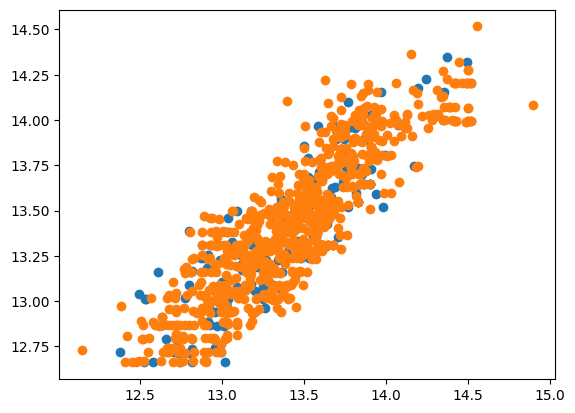

In [ ]:
X_categorical = pd.get_dummies(cars[['Body_Type', 'No_of_Owners', 'Fuel_Type', 'Transmission', 'Transmission_Type']], drop_first=True)
X_combined = pd.concat([X_categorical, cars[['Mileage_Run', 'Seating_Capacity', 'Make_Year']]], axis=1)

y = cars["Price"]

X_train, X_test, Y_train, Y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

model = LinearRegression().fit(X_train, Y_train)

y_test_pred = model.predict(X_test)

test_mse = mean_squared_error(Y_test, y_test_pred)
test_rmse = test_mse**0.5
test_r2 = r2_score(Y_test, y_test_pred)

import matplotlib.pyplot as plt

plt.scatter(Y_test, y_test_pred)
plt.scatter(Y_train, y_train_pred)
plt.show()




From this graph, we can see that the predicted and true values roughly line up around the diagonal!

<Axes: xlabel='Price', ylabel='Density'>

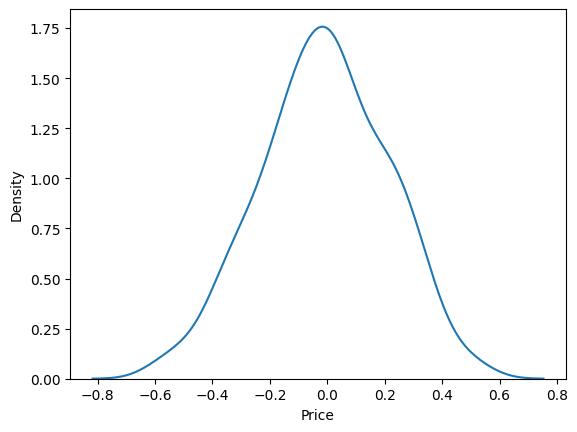

In [166]:
residuals = Y_test - y_test_pred
sns.kdeplot(residuals)


Yes, the residuals roughly look bell shaped around 0!

Judging from the scatter plot of the true and predicted values, we can see that the model is accurately making predictions regarding the price of the car, based on the variables that we used with the model. The relationship between the variables and the target variable is being properly captured by the model, which is good. Additionally, the bell shaped plot around 0 suggests that the model is not underestimating or overestimating price, meaning that our model is successfully making predictions without bias. Some of the weaknesses in our model could be that the variables we are using to estimate the target variable could be expanded. For instance, the crash history or whether the car was used as a rental car in the past could greatly affect the price of the car, and could improve our model if added. 

## Q3

### 1. Find a dataset on a topic you’re interested in. Some easy options are data.gov, kaggle.com, and data.world.

In [ ]:
# I chose a dataset on fish!
fish = pd.read_csv('/workspaces/DS-3021/data/Fish.csv')

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


### 2. Clean the data and do some exploratory data analysis on key variables that interest you. Pick a particular target/outcome variable and features/predictors.

In [202]:
fish.dtypes

Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

In [204]:
fish.head()
# I decided to make the fish weight my target variable

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


### 3. Split the sample into an ~80% training set and a ~20% test set.

### (and) 4. Run a few regressions of your target/outcome variable on a variety of features/predictors. Compute the RMSE on the test set.

In [ ]:
# running the model on just the categorical variables

X_categorical = pd.get_dummies(fish[['Species']], drop_first=True)

y = fish['Weight']

X_train, X_test, Y_train, Y_test = train_test_split(X_categorical, y, test_size=0.2, random_state=42)

model = LinearRegression().fit(X_train, Y_train)

y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

test_mse = mean_squared_error(Y_test, y_test_pred)
test_rmse = test_mse**0.5
test_r2 = r2_score(Y_test, y_test_pred)

print(test_r2)
print(test_rmse)

0.4022991105087622
291.57597339705336


In [ ]:
# running the model in just the numerical variables 
X = fish[['Length1', 'Length2', 'Length3', 'Height', 'Width']]

y = fish['Weight']

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression().fit(X_train, Y_train)

y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

test_mse = mean_squared_error(Y_test, y_test_pred)
test_rmse = test_mse**0.5
test_r2 = r2_score(Y_test, y_test_pred)

print(test_r2)
print(test_rmse)

0.8821430593048695
129.47543084748065


In [206]:
# running the model on both numerical and categorical variables

X_combined = pd.concat([X_categorical, X], axis=1)

y = fish['Weight']

X_train, X_test, Y_train, Y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

model = LinearRegression().fit(X_train, Y_train)

y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

test_mse = mean_squared_error(Y_test, y_test_pred)
test_rmse = test_mse**0.5
test_r2 = r2_score(Y_test, y_test_pred)

print(test_r2)
print(test_rmse)

0.950735248005451
83.71011402365896


<Axes: xlabel='Weight', ylabel='Density'>

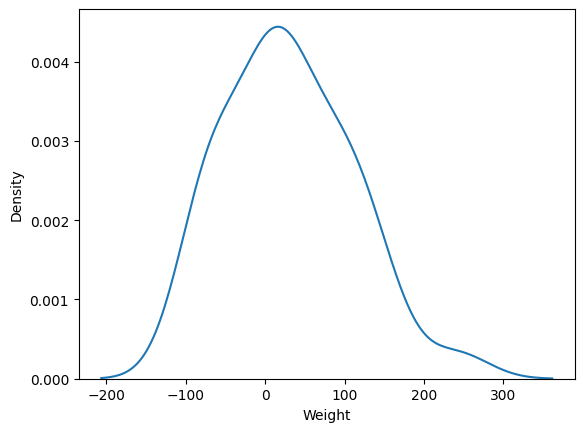

In [190]:
residuals = Y_test - y_test_pred
sns.kdeplot(residuals)

The residuals are roughly bell shaped around 0!

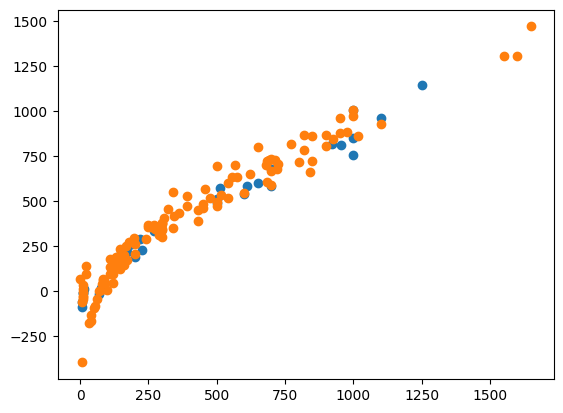

In [191]:
plt.scatter(Y_test, y_test_pred)
plt.scatter(Y_train, y_train_pred)
plt.show()

Yay the test values are along the diagonal!

### 5. Which model performed the best, and why?

The model that performed the best was the model that used both the numerical and categorical variables. This is because all of the features in the data had somewhat of a relationship to the weight of the fish, and could contribute to the model. When just the numerical or categorical variables were isolated, the model couldn't make predictions as accurate as compared to if they were both incorporated. 

### 6. What did you learn?

In the specific Q3 portion of this lab, I learned that fish weight is very simple to predict using other variables such as the different lengths, width, and species! Regression wise, over the course of this lab I grew much more comfortable using regression to predict target variables. I learned that there's ways to incorporate non-linear relationships between the dependent and independent variables, which is something that I didn't know was possible prior to this lab. Not only that, but I also learned how to do this with PolynomialFeatures, and applied it to the dataset I was working with. I also learned what the bell curve around 0 for the residuals means in regards to the model, as well as how to plot this to see the bias within the model. I also grew much more familiar with what the coefficients mean in different scenarios, such as when a variable is not dropped when getting dummies, versus when it is. I also learned in depth what the dummy variable trap is and why it occurs, when before I just had a general idea that dropping one variable is good. In conclusion, this lab helped me build upon and truly understand the ideas that we discussed in class. The combination of the real application of the skills, as well as the questions we had to answer to test our understanding of what we were doing led to me feeling much more comfortable with both the concepts and skills required for regression models. 